# 신경망 생성

- `torch.nn` 패키지 사용
- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함
- 파이토치에서 신경망생성을 위한 기본 틀
```python
1. class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

2. class MyModel(nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()
```
- `conv2d` 에이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

### 신경망 정의

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
            
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 선형회귀(Linear Regression) 모델 생성

##### modules import

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

##### 데이터 생성 및 회귀식 설정

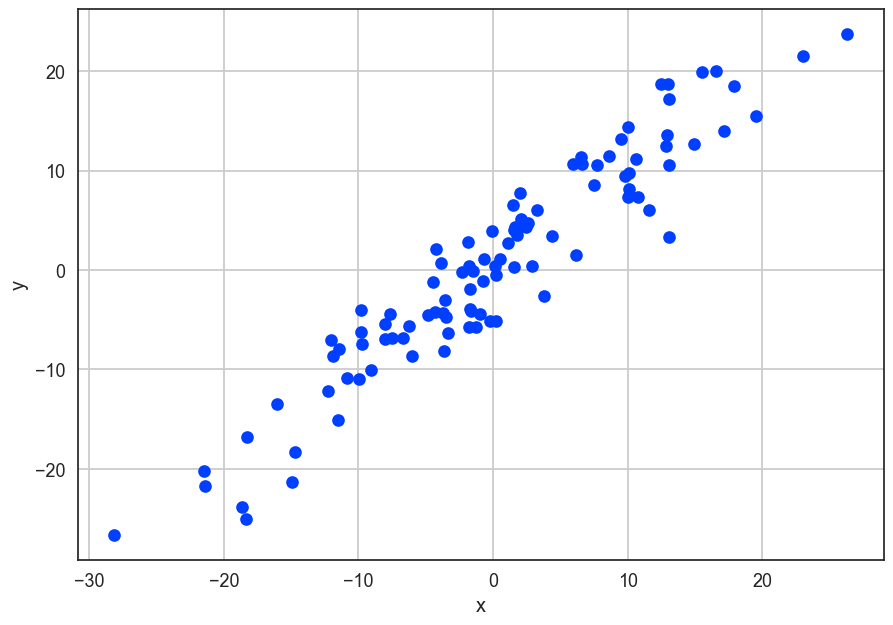

In [29]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

##### 신경망 구성

In [5]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, X):
        pred = self.linear(X)
        return pred

##### 모델 생성 및 파라미터 확인

In [6]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [7]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


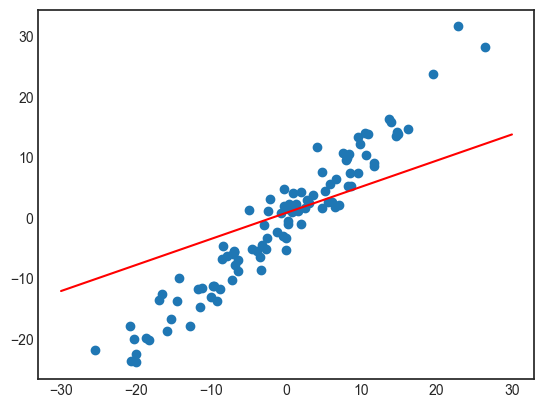

In [8]:
w, b = model.parameters()
def get_params():
    return w[0][0].item(), b[0].item()

def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()
    
plot_fit('Initial Model')

##### 손실함수와 옵티마이저

In [9]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

##### 모델 학습 과정 보기

In [10]:
for name, param in model.named_parameters():
    print(f"[Differential of first {name.split('.')[1]} parameters]\n{name.split('.')[1]}: {param.grad}")

print(f'\n[First X]\n{X[0]}\n')

y_pred = model(X[0])
print(f'[Predicted y]\n{y_pred}')
print(f'[Real y]\n{y[0]}\n')

loss = criterion(y_pred, y[0])
print(f'[Loss]\n{loss}\n')
# print(f'[Before Backward]\n{model.linear.weight[0,0]}\n')
print(f'[Before Backward]\n{list(model.named_parameters())[0][1][0][0]}')
    
loss.backward()
optimizer.step()
# print(f'\n[After Backward]\n{model.linear.weight[0,0]}')
print(f'[After Backward]\n{list(model.named_parameters())[0][1][0][0]}\n')

for name, param in model.named_parameters():
    print(f"[Before running zero_grad()]\n{name.split('.')[1]}: {param.grad}")
print()

optimizer.zero_grad()
for name, param in model.named_parameters():
    print(f"[After running zero_grad()]\n{name.split('.')[1]}: {param.grad}")

[Differential of first weight parameters]
weight: None
[Differential of first bias parameters]
bias: None

[First X]
tensor([-11.8375])

[Predicted y]
tensor([-4.2755], grad_fn=<ViewBackward0>)
[Real y]
tensor([-11.7497])

[Loss]
55.863285064697266

[Before Backward]
0.43113183975219727
[After Backward]
0.6080825328826904

[Before running zero_grad()]
weight: tensor([[-176.9507]])
[Before running zero_grad()]
bias: tensor([14.9483])

[After running zero_grad()]
weight: None
[After running zero_grad()]
bias: None


##### 모델 학습

In [11]:
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch: {:3d}\tloss: {:.4f}'.format(epoch+1, loss))

Epoch:   1	loss: 30.3393
Epoch:  11	loss: 8.8979
Epoch:  21	loss: 8.7442
Epoch:  31	loss: 8.7226
Epoch:  41	loss: 8.7026
Epoch:  51	loss: 8.6834
Epoch:  61	loss: 8.6649
Epoch:  71	loss: 8.6471
Epoch:  81	loss: 8.6301
Epoch:  91	loss: 8.6137


##### 시각화

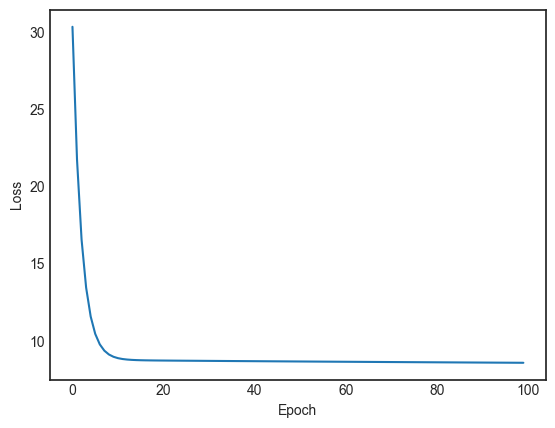

In [13]:
losses = [loss.detach().numpy() for loss in losses]
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

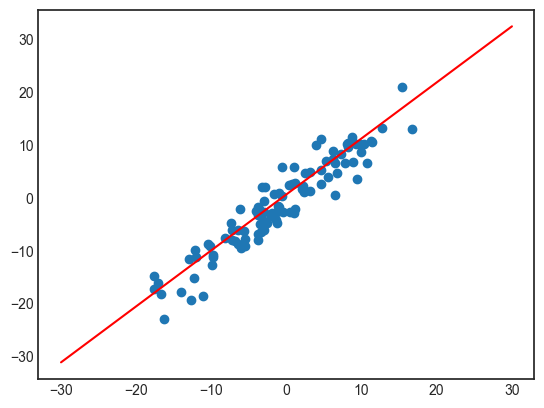

In [ ]:
plot_fit('Trained Model')